In [1]:

import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.regularizers import l2


# Встановлюємо гіперпараметри:
max_features = 10000
maxlen = 500


# Завантаження даних:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



17464789/17464789 [==============================] - 2s 0us/step


In [2]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

**RNN**

In [3]:


# Побудова простої моделі RNN:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))


model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


model_rnn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model_rnn.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 100s 694ms/step - loss: 0.6233 - acc: 0.6602 - val_loss: 0.5519 - val_acc: 0.7328
Epoch 2/6
137/137 [==============================] - 79s 575ms/step - loss: 0.4232 - acc: 0.8291 - val_loss: 0.4021 - val_acc: 0.8403
Epoch 3/6
137/137 [==============================] - 82s 595ms/step - loss: 0.3330 - acc: 0.8790 - val_loss: 0.3772 - val_acc: 0.8512
Epoch 4/6
137/137 [==============================] - 92s 670ms/step - loss: 0.2926 - acc: 0.8969 - val_loss: 0.3712 - val_acc: 0.8557
Epoch 5/6
137/137 [==============================] - 73s 531ms/step - loss: 0.2702 - acc: 0.9058 - val_loss: 0.3711 - val_acc: 0.8645
Epoch 6/6
137/137 [==============================] - 64s 470ms/step - loss: 0.2360 - acc: 0.9205 - val_loss: 0.4379 - val_acc: 0.8104


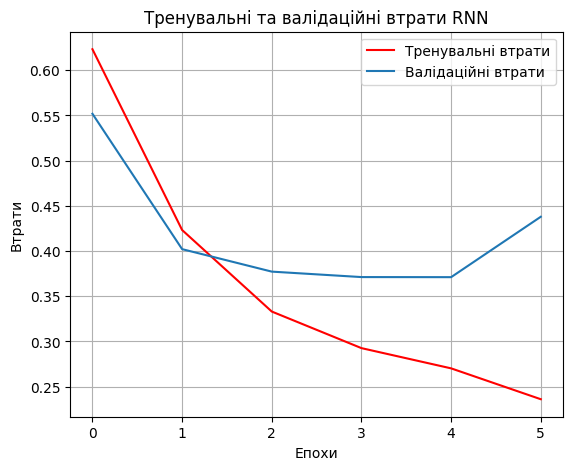

In [5]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

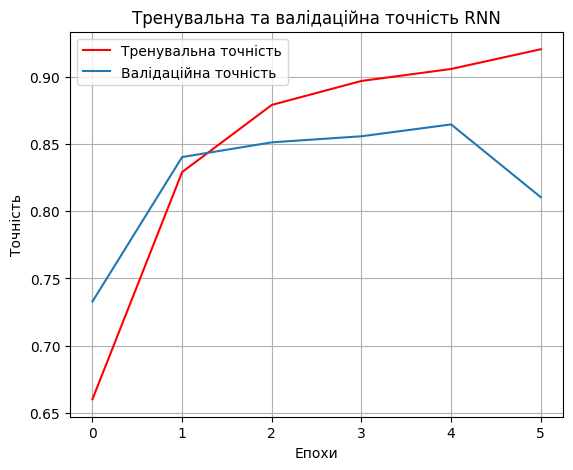

In [6]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

In [7]:
# Прогнозування з використанням навченої моделі:
predictions = model_rnn.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_rnn))
print('Тестова точність: {}'.format(test_acc_rnn))

782/782 [==============================] - 31s 40ms/step
Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 31s 39ms/step - loss: 0.4415 - acc: 0.8064
Тестові втрати: 0.4414695203304291
Тестова точність: 0.8064000010490417


**LSTM**

In [8]:


from keras.layers import Embedding, LSTM


# Побудова моделі LSTM:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32, input_length=maxlen))
model_lstm.add(LSTM(32))
Dropout(0.1)
model_lstm.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.05)))


model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


model_lstm.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model_lstm.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 15s 96ms/step - loss: 0.7320 - acc: 0.5529 - val_loss: 0.6667 - val_acc: 0.6241
Epoch 2/6
137/137 [==============================] - 11s 79ms/step - loss: 0.5701 - acc: 0.7650 - val_loss: 0.4889 - val_acc: 0.8085
Epoch 3/6
137/137 [==============================] - 10s 71ms/step - loss: 0.4348 - acc: 0.8515 - val_loss: 0.4143 - val_acc: 0.8525
Epoch 4/6
137/137 [==============================] - 7s 49ms/step - loss: 0.3828 - acc: 0.8774 - val_loss: 0.3884 - val_acc: 0.8684
Epoch 5/6
137/137 [==============================] - 8s 61ms/step - loss: 0.3410 - acc: 0.8981 - val_loss: 0.3745 - val_acc: 0.8749
Epoch 6/6
137/137 [==============================] - 6s 41ms/step - loss: 0.3126 - acc: 0.9099 - val_loss: 0.3614 - val_acc: 0.8775


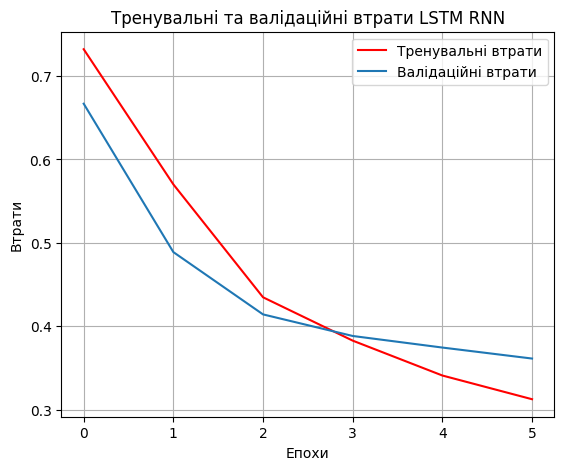

In [10]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати LSTM RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

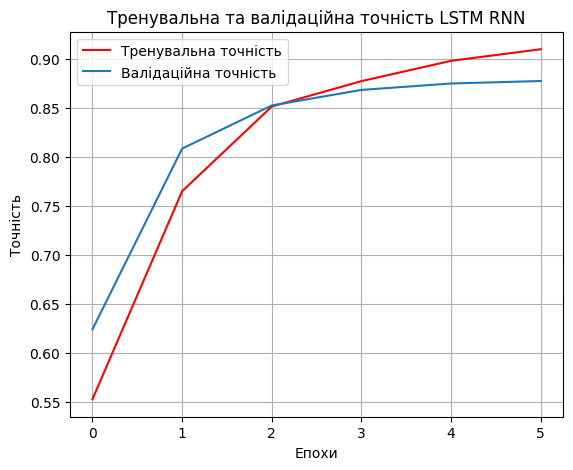

In [11]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність LSTM RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

In [12]:
# Прогнозування з використанням навченої моделі:
predictions = model_lstm.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_lstm))
print('Тестова точність: {}'.format(test_acc_lstm))

782/782 [==============================] - 6s 8ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 6s 8ms/step - loss: 0.3649 - acc: 0.8764
Тестові втрати: 0.36485424637794495
Тестова точність: 0.8763999938964844


**GRU**

In [13]:


from keras.layers import Embedding, GRU


model_gru = Sequential()
model_gru.add(Embedding(max_features, 32, input_length=maxlen))
model_gru.add(GRU(32))
Dropout(0.2)
model_gru.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))


model_gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


model_gru.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model_gru.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 14s 91ms/step - loss: 0.6958 - acc: 0.5714 - val_loss: 0.6493 - val_acc: 0.6251
Epoch 2/6
137/137 [==============================] - 10s 75ms/step - loss: 0.4601 - acc: 0.7955 - val_loss: 0.3848 - val_acc: 0.8413
Epoch 3/6
137/137 [==============================] - 7s 49ms/step - loss: 0.3488 - acc: 0.8648 - val_loss: 0.3689 - val_acc: 0.8529
Epoch 4/6
137/137 [==============================] - 7s 55ms/step - loss: 0.3026 - acc: 0.8901 - val_loss: 0.3628 - val_acc: 0.8575
Epoch 5/6
137/137 [==============================] - 6s 47ms/step - loss: 0.2727 - acc: 0.9053 - val_loss: 0.3477 - val_acc: 0.8641
Epoch 6/6
137/137 [==============================] - 7s 48ms/step - loss: 0.2459 - acc: 0.9175 - val_loss: 0.3596 - val_acc: 0.8587


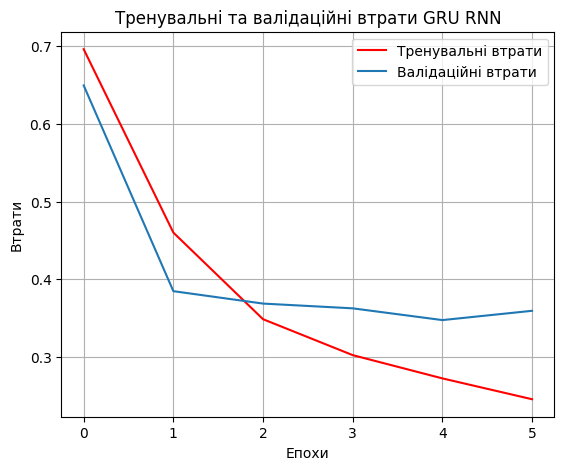

In [15]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати GRU RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

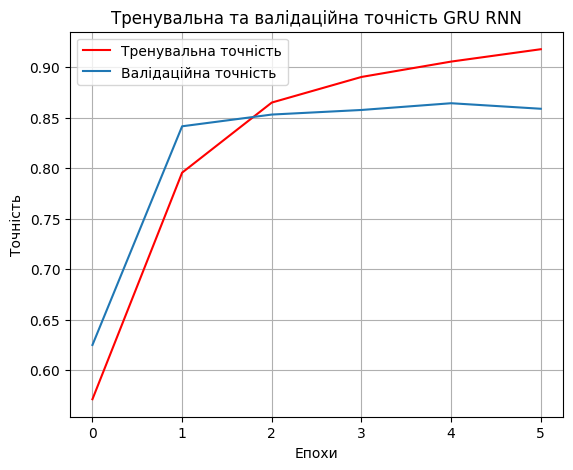

In [16]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність GRU RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

In [17]:
# Прогнозування з використанням навченої моделі:
predictions = model_gru.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_gru, test_acc_gru = model_gru.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_gru))
print('Тестова точність: {}'.format(test_acc_gru))

782/782 [==============================] - 6s 7ms/step
Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 7s 9ms/step - loss: 0.3645 - acc: 0.8556
Тестові втрати: 0.36452776193618774
Тестова точність: 0.8556399941444397


**Deep BRNN**

In [18]:


from keras.layers import Embedding, Bidirectional, LSTM


# Побудова моделі
model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32, input_length=maxlen))
model_brnn.add(Bidirectional(LSTM(32, return_sequences=True)))
model_brnn.add(Bidirectional(LSTM(32)))
Dropout(0.1)
model_brnn.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.1)))


model_brnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


model_brnn.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           320000    
                                                                 
 bidirectional (Bidirection  (None, 500, 64)           16640     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history = model_brnn.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 27s 145ms/step - loss: 0.7642 - acc: 0.5313 - val_loss: 0.6846 - val_acc: 0.6167
Epoch 2/6
137/137 [==============================] - 15s 111ms/step - loss: 0.5402 - acc: 0.7653 - val_loss: 0.4659 - val_acc: 0.8203
Epoch 3/6
137/137 [==============================] - 16s 114ms/step - loss: 0.4063 - acc: 0.8574 - val_loss: 0.3997 - val_acc: 0.8557
Epoch 4/6
137/137 [==============================] - 15s 108ms/step - loss: 0.3544 - acc: 0.8838 - val_loss: 0.4164 - val_acc: 0.8388
Epoch 5/6
137/137 [==============================] - 14s 103ms/step - loss: 0.3087 - acc: 0.9066 - val_loss: 0.3635 - val_acc: 0.8725
Epoch 6/6
137/137 [==============================] - 13s 96ms/step - loss: 0.2765 - acc: 0.9205 - val_loss: 0.3965 - val_acc: 0.8587


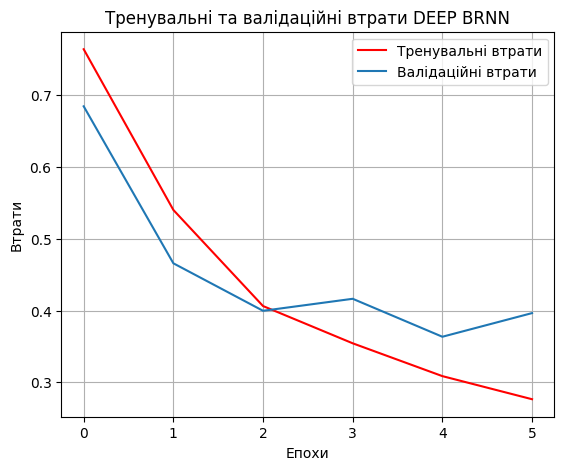

In [20]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати DEEP BRNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

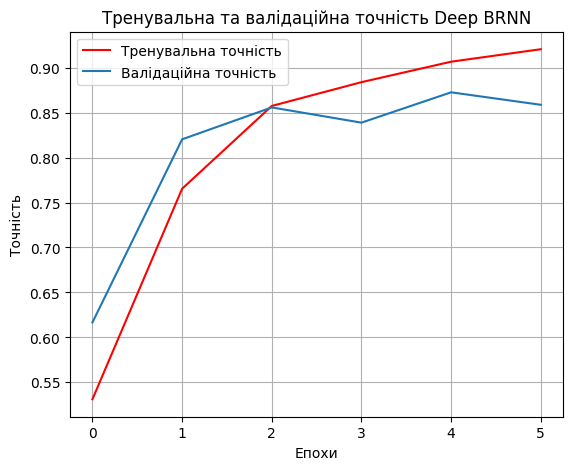

In [21]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність Deep BRNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

In [22]:
# Прогнозування з використанням навченої моделі:
predictions = model_brnn.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_brnn, test_acc_brnn = model_brnn.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_brnn))
print('Тестова точність: {}'.format(test_acc_brnn))

782/782 [==============================] - 23s 27ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 21s 27ms/step - loss: 0.4077 - acc: 0.8519
Тестові втрати: 0.40768617391586304
Тестова точність: 0.8518800139427185


In [23]:
# Порівняння результатів точності і втрат
results = {
    "SimpleRNN": {"test_loss": test_loss_rnn, "test_accuracy": test_acc_rnn},
    "LSTM  RNN": {"test_loss": test_loss_lstm, "test_accuracy": test_acc_lstm},
    "GRU   RNN": {"test_loss": test_loss_gru, "test_accuracy": test_acc_gru},
    "Bidir RNN": {"test_loss": test_loss_brnn, "test_accuracy": test_acc_brnn}
}

print("Модель\t\t  Тестова точність   Тестові втрати")
for model_name, metrics in results.items():
    print(f"{model_name}\t\t{metrics['test_accuracy']:.4f}\t\t{metrics['test_loss']:.4f}")

Модель		  Тестова точність   Тестові втрати
SimpleRNN		0.8064		0.4415
LSTM  RNN		0.8764		0.3649
GRU   RNN		0.8556		0.3645
Bidir RNN		0.8519		0.4077


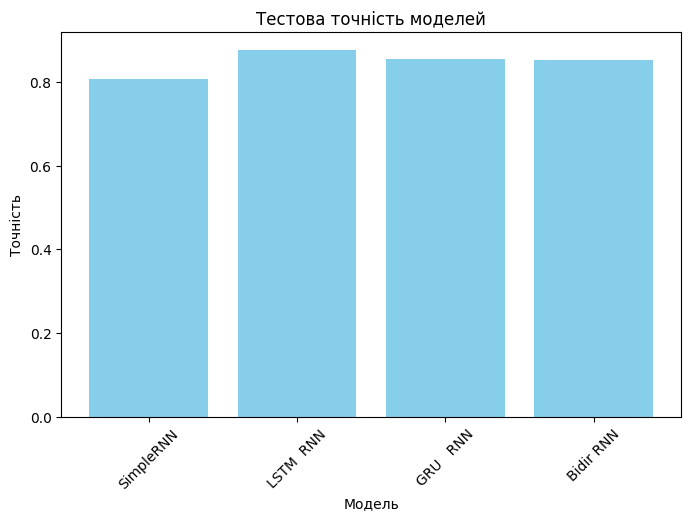

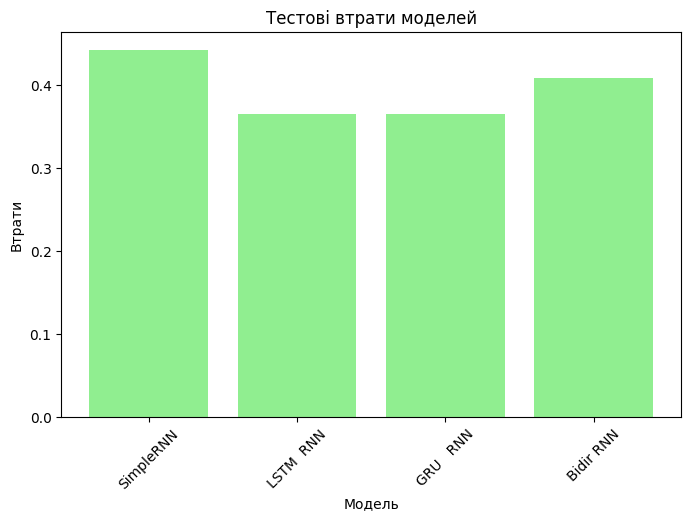

In [24]:
# Візуалізація результатів:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [metrics['test_accuracy'] for metrics in results.values()], color='skyblue')
plt.title('Тестова точність моделей')
plt.ylabel('Точність')
plt.xlabel('Модель')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [metrics['test_loss'] for metrics in results.values()], color='lightgreen')
plt.title('Тестові втрати моделей')
plt.ylabel('Втрати')
plt.xlabel('Модель')
plt.xticks(rotation=45)
plt.show()



В даній роботі було побудовано 4 типи рекурентних нейронних мереж. Для кожної з них було застосовано мінімальну архітектуру шарів додаваючи регуляризація L2 та Dropout, так як на кожному тренуванні було явне перенавчання. Кількість епох на кожному тренуванні становила 6 та розмір пакету даних  128.

Порівнюючи дані моделі можна сказати, що найбільш точною на тестовому датасеті виявилась LSTM з точністю 88%, а найменш точною Звичайна RNN, яка показала лише 81 відсоток точності.

Щодо порівнянь функції втрат, то найменші втрати показала GRU RNN та LSTM  RNN з показником 0,36. Інші моделі показали гірший результат.

Отже, можна зробити висновок, що найкраще себе показала мережа LSTM  RNN.
